In [21]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
!rm ~/.keras/datasets/train-images-idx3-ubyte.gz

rm: /Users/raeez/.keras/datasets/train-images-idx3-ubyte.gz: No such file or directory


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
print(X_train_full.shape) #this contains 60k images of 28x28 array...so this is a 3D array
print(X_train_full.ndim)

(60000, 28, 28)
3


In [14]:
X_train_full


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
#Make a validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]


In [18]:
X_train.shape

(55000, 28, 28)

In [24]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)

In [25]:
X_train_flatten.shape

(55000, 784)

In [20]:
# the y labels are indices to class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

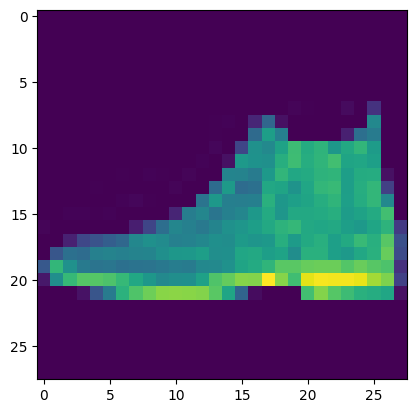

In [22]:
img = X_test[0]
plt.imshow(img)

# Build the model

This MLP has 2 hidden layers

The input layer takes in flattened image of size 784(28*28)

First hidden layer has 300 neurons with RELU act funvtion

Second hidden layer has 100 neurons with RELU act func

Ouptut layer - 10 neurons, one for each class

In [32]:
model  = keras.Sequential([
                keras.Input(shape=(784,)),
                keras.layers.Dense(300, activation='relu'),
                keras.layers.Dense(100, activation = 'relu'),
                keras.layers.Dense(10, activation = 'softmax')
    ])

### Explore NN structure

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Look at the layers, pick one of them and look at its weights and biases.
#Note the weights are random and the biases are initialized to 0.
# Dense layers initialize their weights randomly and biases start at 0, unless an initialization function is specified at time of creation.


In [35]:
model.layers

[<Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [37]:
hidden1 = model.layers[0]
hidden1.name
layer1 = model.get_layer(hidden1.name)
weights, biases = hidden1.get_weights()

In [49]:
weights.shape #each of the input 784 features linked to 300 neurons of this hidden layers, 
# so total 784*300 weights here along with 300 biases (one for each neuron)|

(784, 300)

In [50]:
biases.shape

(300,)

In [43]:
(784*300+300)

235500

## Train the model

In [ ]:
#Due to sparse labels (only 10 outputs) we’ll use sparse categorical crossentropy for calculating loss
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])
